In [92]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("Dataset/Burnout.csv")
df.head()

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,1,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


In [94]:
df.shape

(1800, 11)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1800 non-null   int64  
 1   day_type              1800 non-null   object 
 2   work_hours            1800 non-null   float64
 3   screen_time_hours     1800 non-null   float64
 4   meetings_count        1800 non-null   int64  
 5   breaks_taken          1800 non-null   int64  
 6   after_hours_work      1800 non-null   int64  
 7   sleep_hours           1800 non-null   float64
 8   task_completion_rate  1800 non-null   float64
 9   burnout_score         1800 non-null   float64
 10  burnout_risk          1800 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 154.8+ KB


In [96]:
df.duplicated().sum()

0

In [97]:
df.describe()

,user_id,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,90.500000,6.515117,9.271406,1.941111,3.028889,0.358889,6.996467,72.308556,44.009978
std,51.975162,2.290521,2.409253,1.696178,1.417844,0.479808,1.061740,14.978647,23.881782
min,1.000000,3.000000,4.510000,0.000000,1.000000,0.000000,4.500000,40.000000,2.500000
25%,45.750000,4.430000,7.240000,1.000000,2.000000,0.000000,6.280000,62.300000,25.370000
50%,90.500000,6.445000,9.210000,2.000000,3.000000,0.000000,6.990000,74.500000,39.270000
75%,135.250000,8.510000,11.310000,3.000000,4.000000,1.000000,7.750000,83.700000,58.197500
max,180.000000,12.170000,15.700000,10.000000,5.000000,1.000000,10.800000,107.200000,143.920000


In [98]:
df.isnull().sum()

user_id                 0
day_type                0
work_hours              0
screen_time_hours       0
meetings_count          0
breaks_taken            0
after_hours_work        0
sleep_hours             0
task_completion_rate    0
burnout_score           0
burnout_risk            0
dtype: int64

In [99]:
#Burnout score distribution 

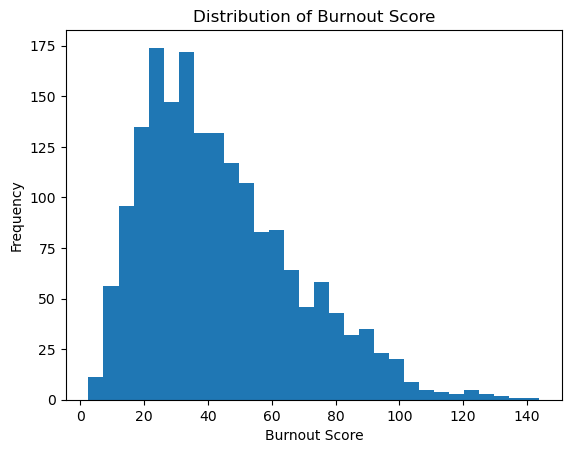

In [100]:
plt.figure()
plt.hist(df["burnout_score"], bins=30)
plt.title("Distribution of Burnout Score")
plt.xlabel("Burnout Score")
plt.ylabel("Frequency")
plt.show()

In [101]:
#Work hours distribution

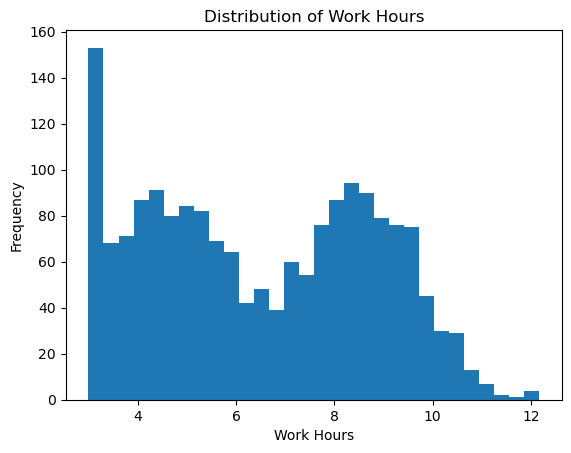

In [102]:
plt.figure()
plt.hist(df["work_hours"], bins=30)
plt.title("Distribution of Work Hours")
plt.xlabel("Work Hours")
plt.ylabel("Frequency")
plt.show()

In [103]:
#Sleep hours distribution

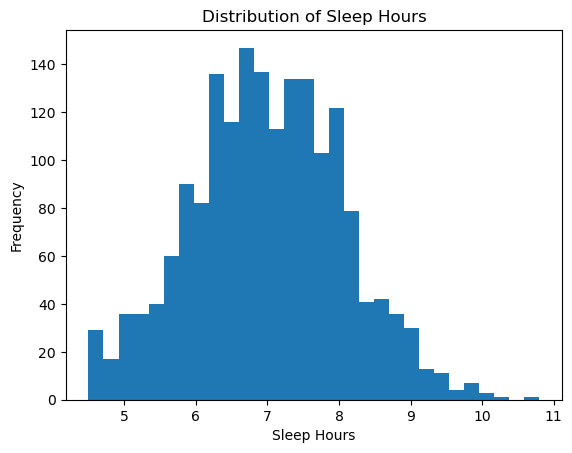

In [104]:
plt.figure()
plt.hist(df["sleep_hours"], bins=30)
plt.title("Distribution of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")
plt.show()

In [105]:
# Encode day_type
df['is_weekday'] = 0
df.loc[df['day_type'] == 'Weekday', 'is_weekday'] = 1

In [106]:
# Encode burnout_risk
df['burnout_risk_num'] = 0
df.loc[df['burnout_risk'] == 'Medium', 'burnout_risk_num'] = 1
df.loc[df['burnout_risk'] == 'High', 'burnout_risk_num'] = 2

In [107]:
# Create work-to-sleep ratio
df['work_to_sleep_ratio'] = df['work_hours'] / df['sleep_hours']

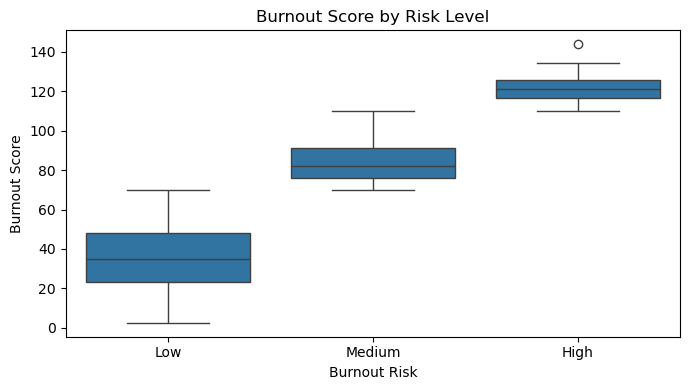

In [108]:
# Burnout score distribution by risk level
import seaborn as sns
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='burnout_risk', y='burnout_score', order=['Low', 'Medium', 'High'])
plt.title('Burnout Score by Risk Level')
plt.xlabel('Burnout Risk')
plt.ylabel('Burnout Score')
plt.tight_layout()
plt.show()

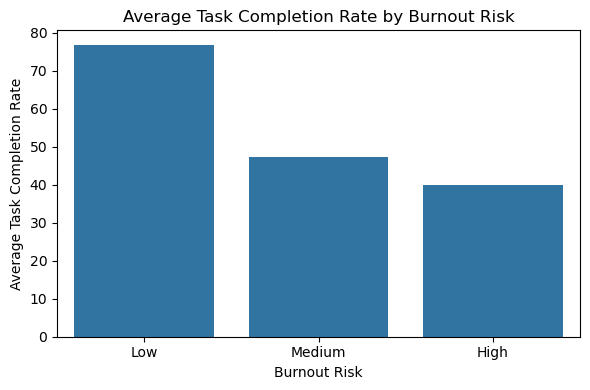

In [109]:
# Average task completion rate by burnout risk level
avg_completion = df.groupby('burnout_risk', as_index=False)['task_completion_rate'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_completion, x='burnout_risk', y='task_completion_rate', order=['Low', 'Medium', 'High'])
plt.title('Average Task Completion Rate by Burnout Risk')
plt.xlabel('Burnout Risk')
plt.ylabel('Average Task Completion Rate')
plt.tight_layout()
plt.show()

In [110]:
###  Modeling Objective: The goal of this analysis is to examine whether remote work characteristics are 
#    significantly related to employee burnout scores. Because burnout score is a continuous numerical variable, 
#    linear regression is an appropriate modeling technique.



# H₀: There is no statistically significant relationship between remote work characteristics and employee burnout scores.
# H₁: At least one remote work characteristic has a statistically significant relationship with burnout score.

# Target (Y): burnout_score
# Predictors (X): work_hours, screen_time, breaks_taken, sleep_hours

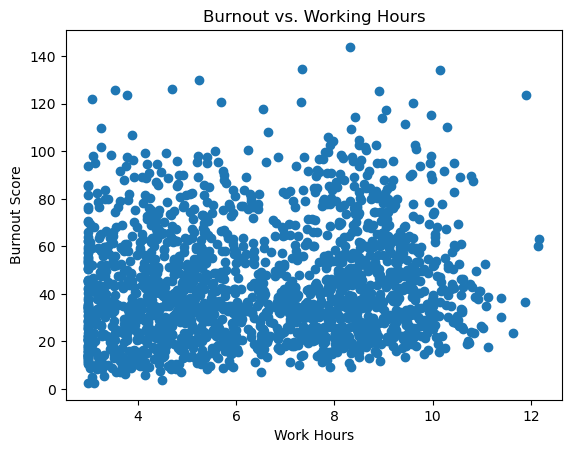

In [111]:
### Initial Correlation Detection

import matplotlib.pyplot as plt

plt.scatter(df["work_hours"], df["burnout_score"])
plt.xlabel("Work Hours")
plt.ylabel("Burnout Score")
plt.title("Burnout vs. Working Hours")
plt.show()

In [112]:
### Simple Linear Regression (SLR)

import statsmodels.formula.api as smf

model_slr = smf.ols("burnout_score ~ work_hours", data=df).fit()
print(model_slr.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     25.97
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           3.84e-07
Time:                        16:59:48   Log-Likelihood:                -8252.3
No. Observations:                1800   AIC:                         1.651e+04
Df Residuals:                    1798   BIC:                         1.652e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.9048      1.686     21.297      0.0

In [113]:
# Prob (F-statistic) is low so we reject null hypothesis so this model is useful

In [114]:
#  burnout_score = 35.9048 + 1.2441 × work_hours
# Employees who work more hours tend to experience higher burnout, 
# with burnout increasing by about 1.24 points for every additional hour worked.

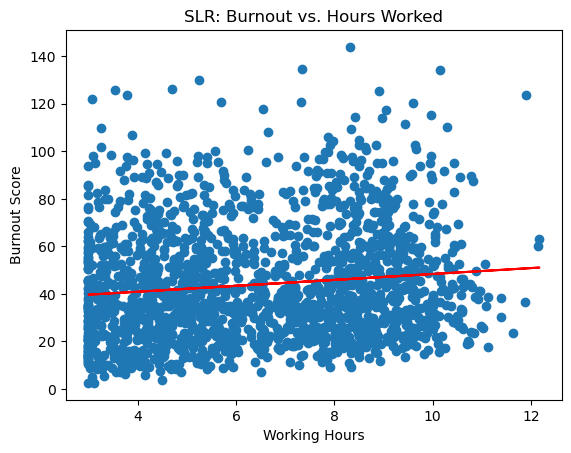

In [115]:
### Visualize SLR Line
# Burnout Score = β0​+β1​(Work Hours)


plt.scatter(df["work_hours"], df["burnout_score"])
plt.plot(df["work_hours"], model_slr.fittedvalues, color="red")
plt.xlabel("Working Hours")
plt.ylabel("Burnout Score")
plt.title("SLR: Burnout vs. Hours Worked")
plt.show()



In [116]:
#Model Performance#

# The R-squared value from the regression output indicates the proportion of variation 
# in burnout score explained by work hours. While the model explains a limited portion 
# of the variability, it provides insight into the relationship between hours worked and burnout levels.

In [117]:
# Work hours have a statistically significant positive relationship with burnout score, indicating that higher work hours are 
# associated with higher levels of burnout.

In [118]:
### Multiple Linear Regression (MLR)

model_mlr = smf.ols(
    "burnout_score ~ work_hours + screen_time_hours + meetings_count + breaks_taken + after_hours_work + sleep_hours + task_completion_rate",
    data=df
).fit()

print(model_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     3028.
Date:                Tue, 24 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:59:53   Log-Likelihood:                -5968.7
No. Observations:                1800   AIC:                         1.195e+04
Df Residuals:                    1792   BIC:                         1.200e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              152.4985 

In [119]:
# adjusted R^2 is better with all variables compared to a single variable
# Pvalue F-statistic is very low so entire model makes sense
# after_hours_work & task_completion_rate only significant <0.05 p-value 

In [120]:
### Multicollinearity (Correlation Matrix)
# Correlation close to +1 or -1 = strong relationship

features = ["work_hours", "screen_time_hours", "meetings_count",
            "breaks_taken", "after_hours_work", "sleep_hours", "task_completion_rate"]

df[features].corr().round(2)

,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate
work_hours,1.00,0.95,0.52,0.02,-0.02,0.01,-0.12
screen_time_hours,0.95,1.00,0.49,0.00,-0.01,0.00,-0.13
meetings_count,0.52,0.49,1.00,0.02,0.01,0.02,-0.09
breaks_taken,0.02,0.00,0.02,1.00,0.04,0.01,0.00
after_hours_work,-0.02,-0.01,0.01,0.04,1.00,-0.00,-0.03
sleep_hours,0.01,0.00,0.02,0.01,-0.00,1.00,0.02
task_completion_rate,-0.12,-0.13,-0.09,0.00,-0.03,0.02,1.00


In [121]:
# work_hours and screen_time_hours are highly correlated; cannot include both 

In [122]:
# Model Selection

# We will compare 3 models:
# Model 1: SLR (one predictor) burnout_score ~ work_hours
# Model 2: MLR without collinear variables
# Model 3: MLR with collinear variables

In [124]:
# Why Linear Regression: Burnout score is continuous, regression is appropriate.
# Goal is explanation + prediction using remote-work factors.

# A simple linear regression model was first estimated to establish a baseline 
# relationship between workload and burnout.

m1 = smf.ols("burnout_score ~ work_hours", data=df).fit()

#  Predictor Grouping for Model 2

m2 = smf.ols(
    "burnout_score ~ work_hours + meetings_count + breaks_taken + sleep_hours + after_hours_work + task_completion_rate",
    data=df
).fit()

# Some predictors, such as work hours, screen time, and after-hours work, 
# measure closely related aspects of employee workload and are therefore likely to be correlated.

# Model 3: Multiple Linear Regression (MLR) – Redundant Predictors Included

# Some predictors, such as work hours, screen time, and after-hours work, measure closely related aspects of 
# employee workload and are therefore likely to be correlated. This model intentionally includes these variables 
# together to examine how redundancy among predictors affects model performance.

m3 = smf.ols(
    "burnout_score ~ work_hours + screen_time_hours + meetings_count + breaks_taken + after_hours_work + sleep_hours + task_completion_rate",
    data=df
).fit()

print("Model 1: Adj R2 =", round(m1.rsquared_adj, 3), " AIC =", round(m1.aic, 1), " BIC =", round(m1.bic, 1))
print("Model 2: Adj R2 =", round(m2.rsquared_adj, 3), " AIC =", round(m2.aic, 1), " BIC =", round(m2.bic, 1))
print("Model 3: Adj R2 =", round(m3.rsquared_adj, 3), " AIC =", round(m3.aic, 1), " BIC =", round(m3.bic, 1))

Model 1: Adj R2 = 0.014  AIC = 16508.6  BIC = 16519.6
Model 2: Adj R2 = 0.922  AIC = 11952.6  BIC = 11991.0
Model 3: Adj R2 = 0.922  AIC = 11953.5  BIC = 11997.5


In [ ]:
# Higher Adjusted R² is better, Lower AIC/BIC is better
## If two models perform similarly, prefer the simpler one because it is easier to interpret.

# highest R^2 m2/3 lowest aic/bic m2

In [34]:
# When we move from a simple model to a multivariable model, explanatory power increases dramatically. 
# However, adding additional workload-related variables does not improve the model, suggesting redundancy. 
# The second model offers the strongest and most efficient explanation of burnout.

In [35]:
### Backward Elimination
# Start with your current best model


# Backward elimination was applied to Model 2 by removing the predictor with the largest p-value greater than 0.05 at each step.
# The variable work_hours was removed first, as it was not statistically significant once other predictors were included. 


In [135]:
b_model = smf.ols(
    "burnout_score ~ work_hours + meetings_count + breaks_taken + sleep_hours + after_hours_work + task_completion_rate",
    data=df
).fit()
print(b_model.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     3532.
Date:                Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:10:04   Log-Likelihood:                -5969.3
No. Observations:                1800   AIC:                         1.195e+04
Df Residuals:                    1793   BIC:                         1.199e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              153.1795 

In [37]:
# Only significant variables are after_work_hours and task_completion_rate
# Remove the variable with the largest p-value: work_hours
# least significant is work_hours - smallest t


In [128]:
### Remove the largest p-value  (work_hours)

b_model = smf.ols(
    "burnout_score ~ meetings_count + breaks_taken + sleep_hours + after_hours_work + task_completion_rate",
    data=df
).fit()
print(b_model.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     4241.
Date:                Tue, 24 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:44:45   Log-Likelihood:                -5969.4
No. Observations:                1800   AIC:                         1.195e+04
Df Residuals:                    1794   BIC:                         1.198e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              153.3764 

In [136]:
# remove meetings_count

b_model = smf.ols(
    "burnout_score ~ breaks_taken + sleep_hours + after_hours_work + task_completion_rate",
    data=df
).fit()
print(b_model.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     5302.
Date:                Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:14:04   Log-Likelihood:                -5969.6
No. Observations:                1800   AIC:                         1.195e+04
Df Residuals:                    1795   BIC:                         1.198e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              153.2327 

In [137]:
# Remove breaks taken 

In [138]:
b_model = smf.ols(
    "burnout_score ~ after_hours_work + task_completion_rate + sleep_hours",
    data=df
).fit()
print(b_model.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     7068.
Date:                Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:17:33   Log-Likelihood:                -5970.3
No. Observations:                1800   AIC:                         1.195e+04
Df Residuals:                    1796   BIC:                         1.197e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              153.5983 

In [140]:
# remove sleep_hours

b_model = smf.ols(
    "burnout_score ~ task_completion_rate + after_hours_work",
    data=df
).fit()
print(b_model.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.060e+04
Date:                Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:18:37   Log-Likelihood:                -5971.2
No. Observations:                1800   AIC:                         1.195e+04
Df Residuals:                    1797   BIC:                         1.196e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              154.9981 

In [132]:
b_model = smf.ols(
    "burnout_score ~ task_completion_rate",
    data=df
).fit()
print(b_model.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.114e+04
Date:                Tue, 24 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:46:30   Log-Likelihood:                -5973.5
No. Observations:                1800   AIC:                         1.195e+04
Df Residuals:                    1798   BIC:                         1.196e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              154.6882 

In [41]:
# Backward elimination was applied by removing the predictor with the largest p-value at each step. 
# In the initial model, work hours had the highest p-value and was therefore removed. 
# The model was then refit to reassess the statistical significance of the remaining predictors.

In [42]:
# **Model Fit vs. Predictor Significance:**

# The high R-squared value indicates that the model explains a large proportion of the variation 
# in burnout score overall. However, a strong model fit does not imply that all individual predictors 
# are statistically significant. Predictor importance is assessed using individual coefficient p-values, 
# which show that some variables contribute meaningfully to the model while others do not.

In [43]:
### Final Model and Conclusion

#Hypothesis Test Interpretation:

# Based on the overall F-statistic and its associated p-value, the null hypothesis is rejected, indicating that at least one 
# predictor in the model is significantly related to employee burnout score.


# At the individual predictor level, task completion rate has a negatively statistically significant relationship with burnout score, 
# while other variables such as work hours and sleep hours do not show statistically significant relationships in the final model.

In [44]:
# Residual Diagnostics
# Residuals vs Fitted (Homoscedasticity)

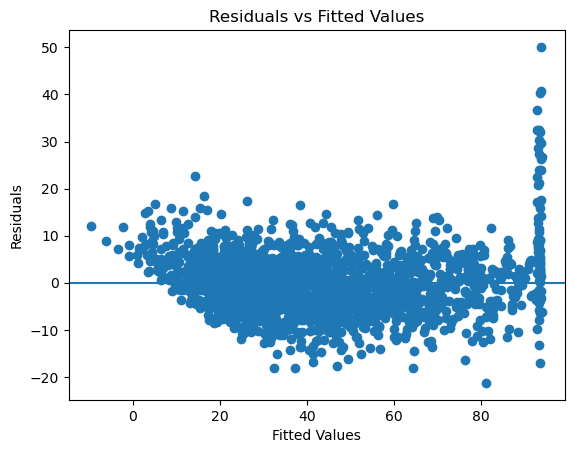

In [45]:
fitted = m2.fittedvalues
residuals = m2.resid

plt.scatter(fitted, residuals)
plt.axhline(0)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [46]:
# Histogram of residuals (Normality intuition)

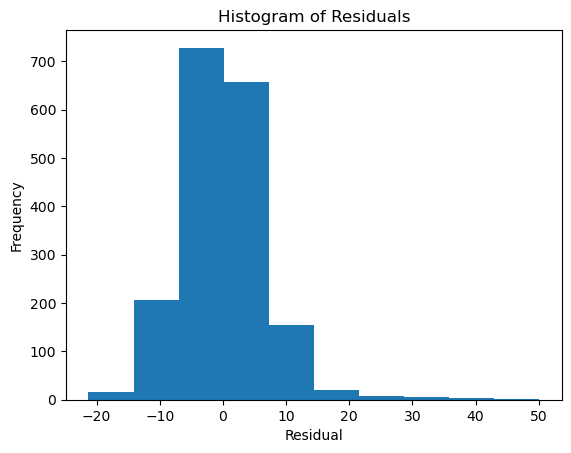

In [134]:
plt.hist(residuals, bins=10)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()